# Campo Eléctrico de una carga puntual centrada en el origen

$$ \textbf{E} = q \left( \dfrac{x}{(x²+y²)^{3/2}} \textbf{i} + \dfrac{y}{(x²+y²)^{3/2}} \textbf{j} \right)$$ 

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [5]:
#Componentes del campo eléctrico
def E(x,y,a,b,q):
    Ex = q*(x-a)/((x-a)**2 + (y-b)**2)**(1.5)
    Ey = q*(y-b)/((x-a)**2 + (y-b)**2)**(1.5)
    
    return Ex, Ey

#Módulo del vector A
def modulo(Ax,Ay):
    A = (Ax**2 + Ay**2)**0.5
    
    return A

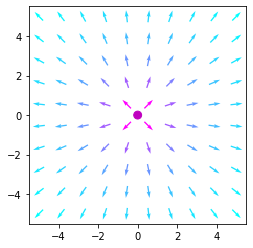

In [21]:
#Conjunto de puntos para evaluar E
x = np.linspace(-5, 5, 10) 
y = np.linspace(-5, 5, 10)

#Crear 'grilla' bidimensional coordenadas (x,y)
X, Y = np.meshgrid(x, y)

#Calcular el E para cada punto, q en el origen
Ex, Ey = E(X, Y, 0, 0, 1)

#Calcular el módulo del E en cada punto
Emod = modulo(Ex, Ey)

circle = plt.Circle((0, 0), 0.2, color = 'm')

#Graficar Campo Vectorial

""" quiver(X,Y: posición de los puntos,
           Ex/Emod, Ey/Emod: componentes del vector, 
           Emod: de acuerdo a esto, se pintan los vectores,
           pivot: ubicación del vector en el punto
           cmap: colormap (matplotlib),
           norm: normaliza (escala)) """
plt.quiver(X, Y, Ex/Emod, Ey/Emod, Emod, 
           pivot = 'middle', 
           cmap='cool', 
           norm=colors.LogNorm(vmin=Emod.min(),vmax=Emod.max()))

#Dibujar carga
plt.gca().add_patch(circle)

#Ejes del mismo tamaño
plt.axis('scaled')

plt.show()

# Campo Eléctrico para dos cargas del signo opuesto (Dipolo)

$$ \textbf{E} = q \left( \dfrac{x-1}{((x-1)²+y²)^{3/2}} \textbf{i} + \dfrac{y}{((x-1)²+y²)^{3/2}} \textbf{j} \right)$$ 

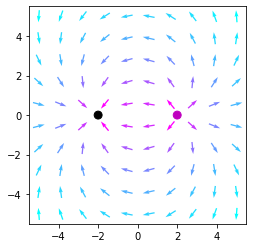

In [30]:
a1 = 2
a2 = -2

#E de cada carga
Ex1, Ey1 = E(X,Y,a1,0,1)
Ex2, Ey2 = E(X,Y,a2,0,-1)

#Suma de Es
Etx = Ex1 + Ex2
Ety = Ey1 + Ey2

Et = modulo(Etx,Ety)

circle_pos = plt.Circle((a1, 0), 0.2, color = 'm')
circle_neg = plt.Circle((a2, 0), 0.2, color = 'k')

plt.quiver(X, Y, Etx/Et, Ety/Et, Et, 
           pivot = 'middle', 
           cmap='cool', 
           norm = colors.LogNorm(vmin=Et.min(),vmax=Et.max()))
plt.gca().add_patch(circle_pos)
plt.gca().add_patch(circle_neg)
plt.axis('scaled')
plt.show()

# Líneas de Campo

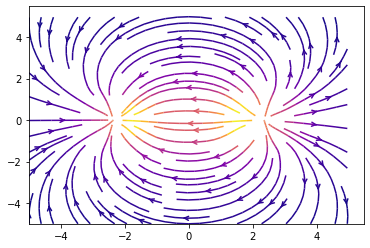

In [33]:
#Función que grafica las líneas de campo
""" streamplot(X, Y: puntos, 
               Etx, Ety: vectores, 
               color: parámetro para el color, 
               cmap: colormap, 
               arrowstyle: estilo de las flechas)"""
plt.streamplot(X, Y, Etx, Ety, 
               color = Et, 
               cmap='plasma', 
               arrowstyle='->')
plt.show()

# Potencial Eléctrico para un dipolo

$$ V = \dfrac{q}{(x²+y²)^{1/2}} $$

In [34]:
def V(x, y, a, b, q):
    V = q/((x - a)**2 + (y - b)**2)**(1/2)
    
    return V

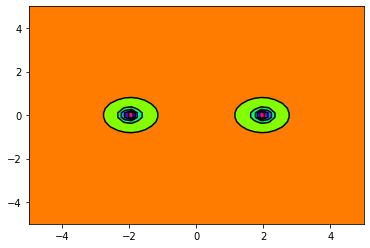

In [60]:
xV = np.linspace(-5, 5)
yV = np.linspace(-5, 5)

XV, YV = np.meshgrid(xV, yV)

V1 = V(XV, YV, a1, 0, 1)
V2 = V(XV, YV, a2, 0, 1)

#Principio de superposición
Vt = V1 + V2

#Graficar Curvas Equipotenciales

#Llena las curvas de nivel
""" contourf(XV, YV: coordenadas,
             Vt: valor de las curvas de nivel, 
             cmap: colormap)"""
plt.contourf(XV, YV, Vt, cmap = 'hsv')
#Dibuja las curvas de nivel
""" contour(XV, YV: coordenadas,
             Vt: valor de las curvas de nivel, 
             colors: color de la linea)"""
plt.contour(XV, YV, Vt, colors = 'k')
#Guardar imagen
# plt.savefig('imagen.png') 
plt.show()